In [ ]:
!gdown --id 1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
!mv _sqlite3.cpython-37m-x86_64-linux-gnu.so /usr/lib/python3.7/lib-dynload/
import os
os.kill(os.getpid(), 9)

Downloading...
From: https://drive.google.com/uc?id=1BSHIKQ7rFw5BpTq5nw1UZfjPK_7Mpnbi
To: /content/_sqlite3.cpython-37m-x86_64-linux-gnu.so
100% 6.33M/6.33M [00:00<00:00, 55.5MB/s]


Работа с данными

В июле провели специальную акцию, направленную на улучшение ретеншена. Новым юзерам слали письмо с купоном. Сработала ли акция?

# Import и подключение

In [ ]:
import sqlite3
import pandas as pd
import numpy as np

In [ ]:
con = sqlite3.connect('db')

In [ ]:
cur = con.cursor()

In [ ]:
def select(sql):
  return pd.read_sql(sql,con)

https://drive.google.com/file/d/1efmNDUGsMpyHTTXK2PXl_32Exk4IdmRX/view?usp=sharing

# Загрузка и обработка данных

In [ ]:
! gdown --id 1efmNDUGsMpyHTTXK2PXl_32Exk4IdmRX

Downloading...
From: https://drive.google.com/uc?id=1efmNDUGsMpyHTTXK2PXl_32Exk4IdmRX
To: /content/analyst_test_transactions_db.csv
100% 3.07M/3.07M [00:00<00:00, 48.3MB/s]


In [ ]:
df = pd.read_csv('/content/analyst_test_transactions_db.csv')

In [ ]:
df.head()

,user_id,order_id,reg_date,transaction_date,revenue
0,57562,94545.0,2013-12-22,2015-07-16,1088
1,40047,81824.0,2013-11-24,2015-01-19,1027
2,48153,144851.0,2015-07-03,2015-10-29,601
3,54591,116111.0,2013-07-12,2015-04-30,881
4,39789,134943.0,2013-05-25,2015-07-21,984


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76857 entries, 0 to 76856
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           76857 non-null  int64  
 1   order_id          76857 non-null  float64
 2   reg_date          76857 non-null  object 
 3   transaction_date  76857 non-null  object 
 4   revenue           76857 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
df['reg_date'].agg(['min','max'])

min    1900-01-01
max    2015-11-20
Name: reg_date, dtype: object

Переведем даты в нужный формат

In [ ]:
df['reg_date'] = pd.to_datetime(df['reg_date'],format='%Y-%m-%d')
df['transaction_date'] = pd.to_datetime(df['transaction_date'],format='%Y-%m-%d')

Новый столбец - Месяц регистрации пользователя

In [ ]:
df['reg_month'] = df['reg_date'].astype('datetime64[M]')

Количество регистраций и уникальных юзеров

In [ ]:
df.groupby(['reg_month'])['user_id'].agg(['count','nunique'])

,count,nunique
reg_month,,
1900-01-01,53,53
2012-02-01,9,9
2012-03-01,362,361
2012-04-01,370,370
2012-05-01,301,301
2012-06-01,445,443
2012-07-01,370,369
2012-08-01,271,269
2012-09-01,356,355


Месяц транзакции

In [ ]:
df['transaction_month'] = df['transaction_date'].astype('datetime64[M]')

Количество покупок и покупателей

In [ ]:
df.groupby(['transaction_month'])['user_id'].agg(['count','nunique'])

,count,nunique
transaction_month,,
2015-01-01,4058,3951
2015-02-01,4932,4777
2015-03-01,5824,5599
2015-04-01,6102,5862
2015-05-01,6339,6063
2015-06-01,6829,6480
2015-07-01,7520,7166
2015-08-01,8598,8110
2015-09-01,8468,7964


Уникальные users

In [ ]:
df['user_id'].nunique()

48214

Количество месяцев

In [ ]:
len(df.groupby(['reg_month'])['user_id'].agg(['count','nunique']))

47

Количество записей при cross join. Каждый месяц жизни пользователя

In [ ]:
48214 * 47

2266058

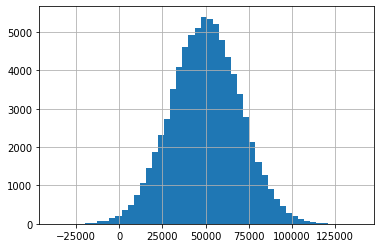

In [ ]:
df['user_id'].hist(bins=50)

In [ ]:
df[df['user_id']<0]

,user_id,order_id,reg_date,transaction_date,revenue,reg_month,transaction_month
117,-7670,84002.0,2015-02-09,2015-02-22,808,2015-02-01,2015-02-01
144,-4741,141322.0,2015-06-15,2015-10-07,728,2015-06-01,2015-10-01
339,-16994,22456.0,2015-06-13,2015-07-25,878,2015-06-01,2015-07-01
380,-6927,157109.0,2015-02-07,2015-06-12,727,2015-02-01,2015-06-01
503,-5446,74254.0,2014-08-08,2015-03-05,711,2014-08-01,2015-03-01
...,...,...,...,...,...,...,...
76104,-10718,85345.0,2014-09-12,2015-09-25,783,2014-09-01,2015-09-01
76133,-2931,137163.0,2014-11-30,2015-05-13,952,2014-11-01,2015-05-01
76302,-2156,78342.0,2014-09-15,2015-03-11,834,2014-09-01,2015-03-01
76585,-5397,30581.0,2012-03-11,2015-11-20,1054,2012-03-01,2015-11-01


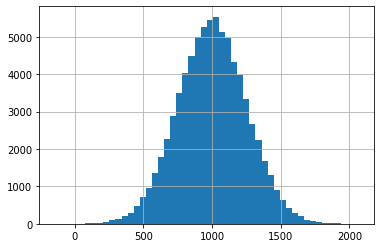

In [ ]:
df['revenue'].hist(bins=50)

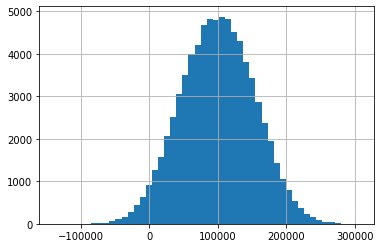

In [ ]:
df['order_id'].hist(bins=50)

Все данные имеют нормальное распределение. Есть отрицательные значения. Данные сгенерированы.

In [ ]:
user = df.groupby('user_id')['reg_month'].min().reset_index()

In [ ]:
user

,user_id,reg_month
0,-37599,2015-01-01
1,-32239,2015-11-01
2,-29822,2015-07-01
3,-29531,2014-09-01
4,-25337,2015-04-01
...,...,...
48209,128964,2015-10-01
48210,130617,2015-02-01
48211,131071,2012-04-01
48212,132484,2015-06-01


In [ ]:
len(df.groupby(['transaction_month'])['user_id'].agg(['count','nunique']))

11

In [ ]:
min_date = df['transaction_month'].min()
max_date = df['transaction_month'].max()

Создаем диапазон дат (календарь), чтобы не пропустить ни одного месяца

In [ ]:
month = pd.DataFrame(pd.date_range(min_date,max_date,freq='MS'))

In [ ]:
month

,0
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01
5,2015-06-01
6,2015-07-01
7,2015-08-01
8,2015-09-01
9,2015-10-01


In [ ]:
month.columns = ['month']

Ключи для cross join

In [ ]:
user['key'] = 1
month['key'] = 1

In [ ]:
user

,user_id,reg_month,key
0,-37599,2015-01-01,1
1,-32239,2015-11-01,1
2,-29822,2015-07-01,1
3,-29531,2014-09-01,1
4,-25337,2015-04-01,1
...,...,...,...
48209,128964,2015-10-01,1
48210,130617,2015-02-01,1
48211,131071,2012-04-01,1
48212,132484,2015-06-01,1


In [ ]:
month

,month,key
0,2015-01-01,1
1,2015-02-01,1
2,2015-03-01,1
3,2015-04-01,1
4,2015-05-01,1
5,2015-06-01,1
6,2015-07-01,1
7,2015-08-01,1
8,2015-09-01,1
9,2015-10-01,1


In [ ]:
template = user.merge(month,on='key')[['user_id','reg_month','month']]

In [ ]:
template

,user_id,reg_month,month
0,-37599,2015-01-01,2015-01-01
1,-37599,2015-01-01,2015-02-01
2,-37599,2015-01-01,2015-03-01
3,-37599,2015-01-01,2015-04-01
4,-37599,2015-01-01,2015-05-01
...,...,...,...
530349,138987,2014-10-01,2015-07-01
530350,138987,2014-10-01,2015-08-01
530351,138987,2014-10-01,2015-09-01
530352,138987,2014-10-01,2015-10-01


In [ ]:
len(template)

530354

In [ ]:
template = template[template['month'] >= template['reg_month']]

In [ ]:
len(template)

467625

Транзакции по месяцу

In [ ]:
trans_month = df.groupby(['user_id','transaction_month'])['revenue'].sum().reset_index()

In [ ]:
trans_month.columns = ['user_id','month','revenue']

In [ ]:
trans_month

,user_id,month,revenue
0,-37599,2015-03-01,1182
1,-32239,2015-11-01,727
2,-29822,2015-09-01,908
3,-29531,2015-06-01,1462
4,-25337,2015-07-01,899
...,...,...,...
73027,128964,2015-10-01,1049
73028,130617,2015-06-01,1295
73029,131071,2015-10-01,856
73030,132484,2015-08-01,747


Соеденяем таблицы left join, чтобы у пользователя, который не совершал покупок был Nan(пропуск) в revenue

In [ ]:
report = template.merge(trans_month,on=['user_id','month'],how='left')

Добавлю маркер активности

In [ ]:
report['active'] = (report['revenue'] > 0)*1

In [ ]:
report

,user_id,reg_month,month,revenue,active
0,-37599,2015-01-01,2015-01-01,NaN,0
1,-37599,2015-01-01,2015-02-01,NaN,0
2,-37599,2015-01-01,2015-03-01,1182.0,1
3,-37599,2015-01-01,2015-04-01,NaN,0
4,-37599,2015-01-01,2015-05-01,NaN,0
...,...,...,...,...,...
467620,138987,2014-10-01,2015-07-01,NaN,0
467621,138987,2014-10-01,2015-08-01,NaN,0
467622,138987,2014-10-01,2015-09-01,NaN,0
467623,138987,2014-10-01,2015-10-01,NaN,0


Процент активных пользователей (retention)
Оставляю данные >= 2015-01-01, поскольку остальные данные не имеют значения при решении задачи

In [ ]:
retention = report[report['reg_month'] >= '2015-01-01'].pivot_table(index='reg_month',columns='month',values='active',aggfunc='mean')

In [ ]:
retention

month,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01
reg_month,,,,,,,,,,,
2015-01-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02-01,NaN,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263
2015-03-01,NaN,NaN,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068
2015-04-01,NaN,NaN,NaN,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451
2015-05-01,NaN,NaN,NaN,NaN,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283
2015-06-01,NaN,NaN,NaN,NaN,NaN,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703
2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN,0.283110,0.331367,0.179088,0.181769,0.124397
2015-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423358,0.268613,0.222628,0.157664
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.429314,0.381497,0.221414


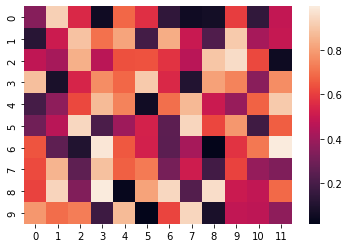

In [ ]:
import seaborn as sns
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

Считаю lifetime (месячный). Месяц покупки - месяц регистрации.

In [ ]:
report['lifetime'] = ((report['month'] - report['reg_month'])/np.timedelta64(1, 'M')).round().astype(int)

In [ ]:
report[report['user_id'] == 128006]

,user_id,reg_month,month,revenue,active,lifetime
467563,128006,2015-01-01,2015-01-01,NaN,0,0
467564,128006,2015-01-01,2015-02-01,539.0,1,1
467565,128006,2015-01-01,2015-03-01,NaN,0,2
467566,128006,2015-01-01,2015-04-01,NaN,0,3
467567,128006,2015-01-01,2015-05-01,NaN,0,4
467568,128006,2015-01-01,2015-06-01,NaN,0,5
467569,128006,2015-01-01,2015-07-01,NaN,0,6
467570,128006,2015-01-01,2015-08-01,NaN,0,7
467571,128006,2015-01-01,2015-09-01,NaN,0,8
467572,128006,2015-01-01,2015-10-01,NaN,0,9


Для корректного отображения записей на графике переведу дату в строчный формат

In [ ]:
report['reg_month_str'] = report['reg_month'].dt.strftime('%Y-%m')

In [ ]:
retention_str = report.pivot_table(index='reg_month_str',columns='lifetime',values='active',aggfunc='mean')

In [ ]:
retention_str

lifetime,0,1,2,3,4,5,6,7,8,9,10
reg_month_str,,,,,,,,,,,
2015-01,0.116928,0.116056,0.129581,0.116492,0.115183,0.124782,0.118237,0.131326,0.126091,0.148778,0.114311
2015-02,0.132856,0.141543,0.135922,0.121615,0.122126,0.119571,0.123659,0.149208,0.163005,0.105263,NaN
2015-03,0.164114,0.138403,0.129650,0.127462,0.138403,0.145514,0.138950,0.170678,0.117068,NaN,NaN
2015-04,0.193627,0.158088,0.144608,0.136029,0.161152,0.137255,0.167892,0.127451,NaN,NaN,NaN
2015-05,0.246457,0.184252,0.154331,0.136220,0.152756,0.159055,0.132283,NaN,NaN,NaN,NaN
2015-06,0.257924,0.216283,0.180236,0.168428,0.189559,0.141703,NaN,NaN,NaN,NaN,NaN
2015-07,0.283110,0.331367,0.179088,0.181769,0.124397,NaN,NaN,NaN,NaN,NaN,NaN
2015-08,0.423358,0.268613,0.222628,0.157664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09,0.429314,0.381497,0.221414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Стоит отметить, что 0 lifetime не имеет 100% retention, потому что активность пользователя определяли по revenue > 0. Пользователь мог зарегистрироваться, но не совершить покупки. 

In [ ]:
sns.set(font_scale=2,style="whitegrid",rc={'figure.figsize':(12,6)})

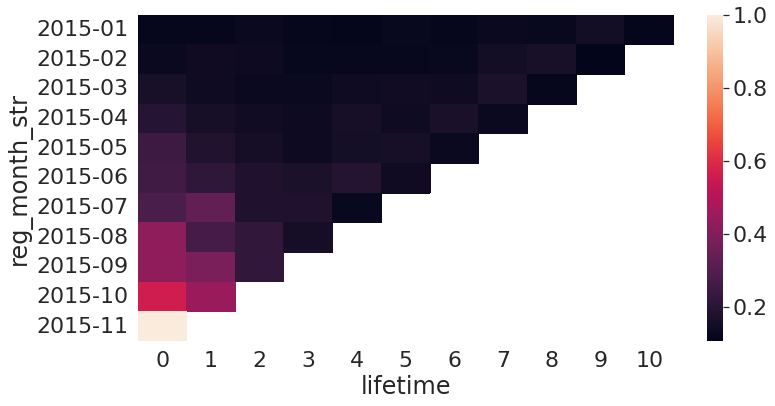

In [ ]:
sns.heatmap(retention_str)

На хитмэпе заметно, что акция (рассылка) оказала положительный эффект на пользователей, которые зарегистрировались в июле 2015. Потому что на следующий месяц после регистрации retention имеет более высокий показатель.